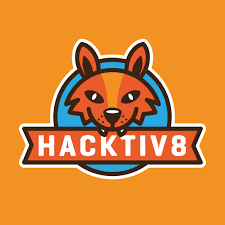

# Assgiment 2 

Anugrah Aidin Yotolembah

PYTN -KS09-023

Python for Data Science - Studi Independen - kampus Merdeka

Kalau kita buat listnya/summary dari perintah di module kode id :

* A. Measure of Central Tendency: Mean     (P/N/S)
* B. Measure of Central Tendency: Median   (P/N/S)
* C. Measure of Central Tendency: Modus    (P/N/S)
* D. Measure of Spread: Range              (P/N/S)
* E. Measure of Spread: Variance           (P/N/S)
* F. Measure of Spread: Standard Deviation (P/N/S)
* G. Probability Distribution              (+C)
* H. Confidence Intervals
* I. Hypothesis Testing                    (+C)

*for each (A - I):
- Question/what data we want to look up
- Pre-processing as needed

===
Keterangan:
(P/N/S) : Pandas / NumPy / Scipy
(+C)    : +Conclusion (menarik informasi/kesimpulan)


## Project Overview

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

- Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?

- Is there a difference in unit sold based on building category?
What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

## Data Preparation

menyiapkan data yang di perlukan

## Import Library 

langkah pertama untuk mengolah data, pertama kita harus memasukkan library yang di perlukan

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize' :(5, 5)})
import statistics
import matplotlib.pyplot as plt
import statsmodels.api as sm 

%matplotlib inline

## Import dataset

selanjutnya ketika sudah import library yang akan di gunakan, selanjut kita akan mengimport atau memasukkan dataset yang akan di gunakan

dataset yang di pakai ialah dataset nyc-rolling-sales.csv

dataset dapat download di bawah ini  : 

https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

In [151]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

print('dataset is ready !!')

dataset is ready !!


## Exploratory Data Analaysis

selanjutnya kita akan mencari infromasi di dalam dataset yang telah kita gunakan

pertama, menampilkan informasi 5 baris teratas di dalam dataset 

In [152]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


selanjutnya kita akan menampilkan informasi 5 baris terbawah di dalam dataset 

In [153]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Selanjutnya, menampilkan informasi tentang data type yang berada di dalam dataset yang kita gunakan

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

selanjutnya,  kita akan menampilkan jumlah kolom dan baris atau (shape) pada dataset 

In [155]:
df.shape

(84548, 22)

bisa di lihat, terdapat 84548 baris dan 22 kolom pada tabel di dalam dataset tersebut 

selanjutnya, kita akan menampilkan header list yang berada di dalam dataset

In [156]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

## Pre-Processing & Cleanning Data

pertama, kita harus mengubah nilai atau value pada BOROUGH menjadi sebuah string nama BOROUGH berdasarkan valuenya, sehingga muda di baca

In [157]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\4211988922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


selanjutnya, mengecek ada kolom apa saja yang ada didalam dataset ini dan jenis nilai yang tersimpan didalam kolom tersebut.

In [158]:
pd.set_option('display.max_columns',999)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


selanjutnya mengecek informasi type data yang berada di dalam dataset

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

bisa di lihat informasi di atas bahwa, terdapat kolom "Unnamed : 0" yang tidak jelas dan terdapat kolom "EASE - MENT" yang sama tidak memiliki value sama sekali, oleh sebab itu kita harus menghapus kedua colomuns tersebut 

In [160]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00


selanjutnya mengecek kolom dan baris atau shape pada dataset

In [161]:
df.shape

(84548, 20)

di karnakan terdapat beberapa kolom memiliki tipe data yang salah misalnya "SALE PRICE" yang memiliki tipe object yang harus bertipe int64, maka kita harus melakukan perubahan  tipe data pada tiap kolom 

In [162]:
df['BOROUGH'] = df['BOROUGH'].astype('string')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('string')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['ADDRESS'] = df['ADDRESS'].astype('string')
df['APARTMENT NUMBER'] = df['APARTMENT NUMBER'].astype('string')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   APARTMENT NUMBER                84548 non-null  string        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

selanjutnya kita akan melakukan pengecekan apakah ada value yang bernilai null pada tabel data tersebut 

In [164]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

pada   "LAND SQUARE FEET", "GROSS SQUARE FEET", dan "SALE PRICE" memiliki value bernilai null. maka diambil data - data yang tidak null dari kolom "GROSS SQUARE FEET" dikarenakan kolom ini memiliki jumlah null terbanyak dan jika setelah dibersihkan masih ada yang null maka akan dilakukan cara yang sama untuk membersihkannya dengan mengambil nilai yang tidak null dari kolom dengan jumlah null terbesar.

In [165]:
df = df[df['GROSS SQUARE FEET'].notnull()]
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [166]:
df.shape

(48244, 20)

selanjutnya mengecek nilai statistik pada dataset

In [167]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


Data yang akan saya observasi adalah data yang memiliki nilai diatas 0, oleh sebab itu data yang bernilai 0 akan dihapus dari observasi. Tetapi data ini akan disimpan ke variabel sementara terlebih dahulu untuk berjaga - jaga apabila data berkurang drastis.

In [168]:
df_temp = df[
    (df['TOTAL UNITS'] != 0) &
    (df['LAND SQUARE FEET'] != 0) &
    (df['GROSS SQUARE FEET'] != 0) &
    (df['YEAR BUILT'] != 0) &
    (df['SALE PRICE'] != 0) &
    (df['ZIP CODE'] != 0)
       ]
df_temp.shape

(29270, 20)

In [169]:
df = df_temp
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,2.927000e+04,2.927000e+04,29270.000000,29270.000000,2.927000e+04
mean,5550.708097,61.181654,10997.383123,3.054493,0.329757,3.382849,4.204053e+03,4.602588e+03,1940.690571,1.228562,1.637125e+06
std,3780.050656,116.561248,476.344549,20.041605,14.031267,24.600632,3.548674e+04,3.413059e+04,30.528042,0.685628,1.701132e+07
min,5.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,1.000000,1.000000e+00
25%,2678.500000,19.000000,10462.000000,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,1.000000,4.200000e+05
50%,4903.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,1.000000,6.200000e+05
75%,7837.750000,64.000000,11373.000000,2.000000,0.000000,2.000000,4.000000e+03,2.672000e+03,1960.000000,1.000000,9.500000e+05
max,16319.000000,3710.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [170]:
df.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,10,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17
22,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,,10009,24,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
173,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,,10009,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,,10009,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03


## A. Meansure of Central Tendency : Mean

### Question :
1. menghitung nilai mean sale price pada setiap Borough 
2. menampilkan hasil hitung nilai mean sale price pada setiap Borough

### Pre-processing

In [171]:
#pertama mari kita top 5 teratas yang berada di dalam tabel di dataset

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [172]:
'''
selanjutnya kita akan pertinjau informasi dari  label yang akan 
kita hitung meannya yaitu label "BOROUGH" dan label "SALE PRICE"
'''

df[['BOROUGH', 'SALE PRICE']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29270 entries, 0 to 84547
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BOROUGH     29270 non-null  string 
 1   SALE PRICE  29270 non-null  float64
dtypes: float64(1), string(1)
memory usage: 686.0 KB


bisa di lihat bahwa value dari label 'BOROUGH' sudah bertipe data string dan 'SALE PRICE' sudah bertipe data  float64, yang nantinya bisa kita hitung nilai meannya

In [173]:
'''
selanjutnya mari kita liat label BOROUGH dan SALE PRICE yang 
nantinya value pada BOROUGH dan SALE PRICE kita akan 
hitung nilai mean nya 
'''

df[['BOROUGH', 'SALE PRICE']]

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0
...,...,...
84543,Staten Island,450000.0
84544,Staten Island,550000.0
84545,Staten Island,460000.0
84546,Staten Island,11693337.0


## implement statistical method

In [174]:
'''
1. menghitung nilai mean sale price pada  Borough
'''

print('1. menghitung nilai mean sale price pada  Borough')
mean_A = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_A

1. menghitung nilai mean sale price pada  Borough


,SALE PRICE
BOROUGH,
Staten Island,5.273297e+05
Queens,9.087225e+05
Bronx,1.022962e+06
Brooklyn,1.502450e+06
Manhattan,1.855378e+07


## Conclusion

berdasarkan data yang telah di olah dan di hitung nilai meannya, dapat di simpulkan bahwa Queens memiliki mean tertinggi yaitu senilai $ 90,872,250 dan mean tertinggi  di antara borough lainnya

In [175]:
print('2. Nilai Mean setiap Borough')
mean_B = df.groupby('BOROUGH').mean()
mean_B

2. Nilai Mean setiap Borough


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,4135.149701,78.648132,10464.518107,4.366410,0.194753,4.560023,4470.121186,5563.561163,1939.211577,1.272598,1.022962e+06
Brooklyn,4741.665471,52.453326,11220.223366,2.717062,0.190052,2.905379,3313.488259,3770.575824,1928.816888,1.283285,1.502450e+06
Manhattan,1315.050797,50.812749,10029.575697,19.316733,2.247012,21.555777,5767.020916,38192.683267,1922.821713,2.333665,1.855378e+07
Queens,8016.914443,53.964276,11395.328389,2.202315,0.413584,2.615176,3975.830153,2964.282988,1939.641313,1.140997,9.087225e+05
Staten Island,3364.094127,81.829148,10308.022148,1.356140,0.098280,1.453233,5730.664821,2271.740953,1967.856239,1.076528,5.273297e+05


## Conclusion

pada data tabel yang telah di olah, dapat di simpulkan bahwa di setip BOROUGH memiliki masing masing nilai mean yang berbeda beda, ada yang nilai mean tertinggi dan terendah.

## B. Meansure of Central Tendency : Median

## Question : 
1. Hitunglah Nilai Median pada Sale Price pada setiap BOROUGH

## Pre - Processing

pertama mari kita lihat data tabel dari dataset yang telah kita masukkan

In [176]:
df.head

<bound method NDFrame.head of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ... 

selanjutnya, di karnakan data dari dataset itu terlalu banyak, maka kita akan klasifikasi menjadi kecil, dan kita akan ambil 5 data teratas yang berada di dalam tabel dataset

In [177]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


## implement statistical method
1. Hitunglah Median pada Sale Price pada setiap BOROUGH

In [178]:
'''
selanjutnya, kita akan mengimplementasikan pertanyaan yang 
telah kita buat, kita akan menghitung Nilai median harga jual setiap BOROUGH
'''
median = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median

,SALE PRICE
BOROUGH,
Bronx,480000.0
Staten Island,485000.0
Queens,635000.0
Brooklyn,850000.0
Manhattan,6025000.0


## Conclusion

berdasarkan dataset yang telah kita olah dan kita cari nilai mediannya, dapat di simpulkan bahwa nilai median dengan sale price tertinggi yaitu Manhattan.

## C. Measure of Central Tendency : Modus

## Question
1. Hitunglah Nilai Modus GROSS SQUARE FEET pada setiap BOROUGH

## Pre - Processing 

langkah pertama, mari kita lihat keselurahan data di dalam tabel dataset

In [179]:
df.head

<bound method NDFrame.head of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ... 

In [180]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


di karnakan kita akan menghitung nilai modus GROSS SQUARE FEET pada setiap Borough

In [181]:
df[['BOROUGH', 'GROSS SQUARE FEET']]

,BOROUGH,GROSS SQUARE FEET
0,Manhattan,6440.0
3,Manhattan,6794.0
4,Manhattan,4615.0
6,Manhattan,4226.0
9,Manhattan,18523.0
...,...,...
84543,Staten Island,2575.0
84544,Staten Island,2377.0
84545,Staten Island,1496.0
84546,Staten Island,64117.0


## implement statistical method

1. Hitunglah Nilai Modus GROSS SQUARE FEET pada setiap BOROUGH

untuk menjawab pertanyaan di atas, maka kita akan mencari Nilai  modus dari GROSS SQUARE FEET pada setiap BOROUGH

In [182]:
modus = df[['BOROUGH', 'GROSS SQUARE FEET']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus

,BOROUGH,GROSS SQUARE FEET
0,Bronx,2400.0
1,Brooklyn,3000.0
2,Manhattan,112850.0
3,Queens,1224.0
4,Staten Island,1200.0


## Conclusion

berdasarkan data yang telah di hitung nilai modusnya, bisa di simpulkan bahwa pada BOROUGH Manhattan memiliki nilai modus (mode) pada Gross Squere Feet (luas wilayah bangunan ) yang paling tinggi  diantara BOROUGH lainnya.

cat : Gross Square Feet merupakan jumlah semua luas wilayah  bangunan 

## D. Measure of Spread: Range

## Questions

1. Hitunglah nilai Range Price Sale setiap BOROUGH

## Pre - Processing 

pertama, mari kita lihat kesuluran data agar kita mendapatkan informasi dari dataset

In [183]:
df.head

<bound method NDFrame.head of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ... 

selanjutnya, informasi datanya kita perkecil lagi menjadi data 5 teratas yang berada di dataset

In [184]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya, di karnakan kita akan mencari nilai range pada price sale, makan kita akan melihat tabel dari sale prace berdasarkan tiap BOROUGH

In [185]:
df[['BOROUGH', 'SALE PRICE']]

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0
...,...,...
84543,Staten Island,450000.0
84544,Staten Island,550000.0
84545,Staten Island,460000.0
84546,Staten Island,11693337.0


## implement statistical method

Selanjutnya, kita akan menghitung nilai range sesuai yang berdasarkan pertanyaan yang telah kita buat

In [186]:
range_1 = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_1

BOROUGH
Bronx            1.100000e+08
Brooklyn         1.542500e+08
Manhattan        2.210000e+09
Queens           2.575000e+08
Staten Island    1.190000e+07
dtype: float64

bisa di katakan nilai range Sale Price pada setiap BOROUGH sebagai berikut 
    

In [187]:
nr= pd.DataFrame([
    {'BOROUGH' : 'Bronx', 'PRICE SALE'         : '$ 110, 000, 000'},
    {'BOROUGH' : 'Brooklyn', 'PRICE SALE'      : '$ 154, 250, 000'},
    {'BOROUGH' : 'Manhattan', 'PRICE SALE'     : '$ 2, 210, 000, 000'},
    {'BOROUGH' : 'Queens', 'PRICE SALE'        : '$ 2, 575, 000'},
    {'BOROUGH' : 'Staten Island', 'PRICE SALE' : '$ 1, 190, 000'}])
nr

,BOROUGH,PRICE SALE
0,Bronx,"$ 110, 000, 000"
1,Brooklyn,"$ 154, 250, 000"
2,Manhattan,"$ 2, 210, 000, 000"
3,Queens,"$ 2, 575, 000"
4,Staten Island,"$ 1, 190, 000"


## Conclusion

berdasarkan data yang kita olah dan data yang telah kita cari nilai rangenya, bisa di simpulkan bahwa nilai range price sale di tiap wilayah itu berbeda beda, dan Manhattan memiliki nilai range paling tinggi pada Price sale 

## E.Measure of Spread: Variance

## Questions :

1.Hitunglah nilai Variance setiap BOROUGH

## Pre - Processing 

Langkah pertama, mari kita lihat data keseluruhan dari dataset yang telah kita gunakan

In [188]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya, di karnakan kita akan menghitung nilai varience pada setiap BOROUGH, maka kita akan liat label BOROUGH terlebih dahulu

In [189]:
df[['BOROUGH']]

,BOROUGH
0,Manhattan
3,Manhattan
4,Manhattan
6,Manhattan
9,Manhattan
...,...
84543,Staten Island
84544,Staten Island
84545,Staten Island
84546,Staten Island


## implement statistical method

selanjutnya kita akan memproses program untuk menghitung dan mencari nilai varience pada setiap Borough

In [190]:
var = df.groupby('BOROUGH').var()
var

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,9.670577e+05,41481.579519,65.375243,654.322922,0.926978,676.235059,3.678044e+08,7.358995e+08,869.372222,0.532058,1.446067e+13
Brooklyn,6.297712e+06,10387.037068,128.505053,53.294995,0.590554,54.018117,4.861101e+08,1.844299e+08,758.685925,0.526520,2.233832e+13
Manhattan,3.398025e+05,9339.755530,1641.708123,4432.822810,187.843211,4603.985919,1.930145e+08,1.202891e+10,1044.944254,1.169713,7.748030e+15
Queens,1.895010e+07,9187.835464,10720.639166,381.552498,500.092410,888.266966,1.648249e+09,1.404191e+09,548.455088,0.330064,1.383419e+13
Staten Island,5.618931e+06,9281.490582,17.118971,8.287498,6.392831,14.496675,2.557099e+09,2.239317e+08,1042.032928,0.209530,2.178743e+11


## Conclusion

Dari tabel di atas diketahui bahwa sebagian besar BOROUGH memiliki nilai standar deviasi yang tinggi, artinya data memiliki sebaran yang banyak

## F. Measure of Spread: Standard Deviation 

## Questions :
1. Hitunglah Standard Deviation setiap BOROUGH

## Pre - Processing

pertama, kita menampilkan semua data dalam tabel data di dataset

In [191]:
df.head

<bound method NDFrame.head of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ... 

selanjutnya, data yang berada di dalam dataset kita perkecil, menjadi 5 data teratas dalam dataset

In [192]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya kita lihat informasi tipe data apa saja di pakai di dalam data di dalam dataset

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29270 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         29270 non-null  string        
 1   NEIGHBORHOOD                    29270 non-null  string        
 2   BUILDING CLASS CATEGORY         29270 non-null  category      
 3   TAX CLASS AT PRESENT            29270 non-null  category      
 4   BLOCK                           29270 non-null  int64         
 5   LOT                             29270 non-null  int64         
 6   BUILDING CLASS AT PRESENT       29270 non-null  category      
 7   ADDRESS                         29270 non-null  string        
 8   APARTMENT NUMBER                29270 non-null  string        
 9   ZIP CODE                        29270 non-null  int64         
 10  RESIDENTIAL UNITS               29270 non-null  int64         
 11  CO

## implement statistical method

selanjutnya, menjawab dari pertanyaan, kita akan mencari dan menghitung nilai dari standard deviation dari setiap BOROUGH

In [194]:
sdn = df.groupby('BOROUGH').std()
sdn

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,,,,,,,,,,,
Bronx,983.390934,203.670272,8.085496,25.579737,0.962797,26.004520,19178.228084,27127.467666,29.485119,0.729423,3.802718e+06
Brooklyn,2509.524342,101.916814,11.336007,7.300342,0.768475,7.349702,22047.904100,13580.498020,27.544254,0.725617,4.726343e+06
Manhattan,582.925809,96.642411,40.517998,66.579447,13.705591,67.852678,13892.965927,109676.367462,32.325598,1.081533,8.802290e+07
Queens,4353.171208,95.853197,103.540519,19.533369,22.362746,29.803808,40598.630194,37472.533843,23.419118,0.574512,3.719434e+06
Staten Island,2370.428532,96.340493,4.137508,2.878802,2.528405,3.807450,50567.763441,14964.346334,32.280535,0.457745,4.667700e+05


## Conclusion

berdasarkan data di atas yang telah di olah dan di hitung nilai standard deviation, maka dapat di simpulkan   bahwa sebagian besar BOROUGH memiliki nilai standar deviasi yang tinggi, artinya data memiliki sebaran yang besar

## G. Probability Distribution 

1. Buat distribusi probabilitas PRICE LICE pada BOROUGH Staten Island

## Pre - Processing

langkah pertama mari kita baca data pertama dari semua data yang berada di dataset

In [195]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya, di karnakan banyak sekali data yang berada di dalam tabel, kita akan menampilkan 5 data teratas yang berada di data tabel di dataset

In [196]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya, kita bisa lihat data  dalam label BOROUGH dan melihat data PRICE SALE nya

In [197]:
df[['BOROUGH', 'SALE PRICE']]

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0
...,...,...
84543,Staten Island,450000.0
84544,Staten Island,550000.0
84545,Staten Island,460000.0
84546,Staten Island,11693337.0


## implement statistical method

selanjutnya, kita akan implementasikan Probability Distribution berdasarkan pertanyaan yang telah kita tentukan di awal, iyalah Probability Distribution dari BOROUGH yaitu Staten Island

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'probability of occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Staten Island')]

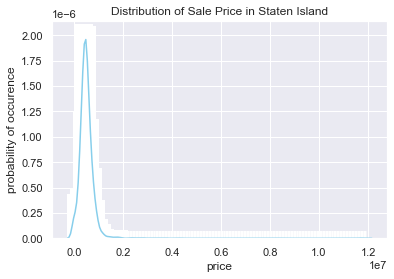

In [198]:
df1=df.groupby("BOROUGH")
br = df1.get_group('Staten Island')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='price', ylabel='probability of occurence', title='Distribution of Sale Price in Staten Island')


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


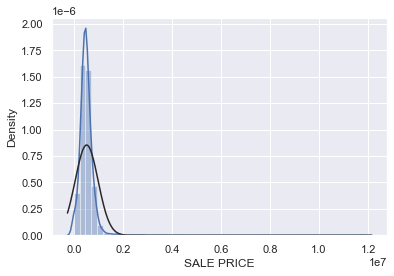

In [199]:
from scipy.stats import norm
x = pd.Series(br['SALE PRICE'].values, name="SALE PRICE")
ax = sns.distplot(x, fit=norm, kde=True)

## Conclusion

dari data yang telah di olah dan telah dibuatkan distribusi, bisa di simpulkan bahwa pada Dari plot distribusi di atas kita tahu bahwa Price Sale Staten Island mengikuti dataset dan  lebih tinggi dari distribusi normal

## H. Confidence Intervals

## Questions : 
1. di karnakan BOROUGH Manhattan menjual propertynya lebih mahal dari BOROUGH lainnya, maka berapakah Confidence Intervals  mean Sale Price di Manhattan ?

## Pre - Processing 

pertama, marilah kita membaca dan mengolah data keseluruhan  yang berada di dataset. 

In [200]:
df.head

<bound method NDFrame.head of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ... 

Selanjutnya, data yang telah kita kita lihat keseluruhan, kita akan perkecil menjadi 5 data teratas yang berada di dataset

In [201]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


selanjutnya, karna kita akan mengola data BOROUGH dan Sale Price  di Manhattan untuk mencari nilai mean, maka terlebih dahulu melihat data BOROUGH dan Sale Price  

In [202]:
df[['BOROUGH', 'SALE PRICE']].head()

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
3,Manhattan,3936272.0
4,Manhattan,8000000.0
6,Manhattan,3192840.0
9,Manhattan,16232000.0


selanjutnya, kita buat data frame yang di dalam nya tercantum mean 

In [203]:
ci = df.groupby("BOROUGH").agg({"SALE PRICE" : [np.mean, np.std, np.size]})
ci

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          1.022962e+06  3.802718e+06   3507
Brooklyn       1.502450e+06  4.726343e+06   8645
Manhattan      1.855378e+07  8.802290e+07   1004
Queens         9.087225e+05  3.719434e+06  11057
Staten Island  5.273297e+05  4.667700e+05   5057

## implement statistical method

selanjutnya, kita akan menghitung Confindence intervals dan menghitung nilai mean pada BOROUGH Menhattan

In [204]:
mean_tot = ci.iloc [1,0]  
sd = ci.iloc [1,1]
n = ci.iloc [1,2]         
z = 1.96 

se = sd / np.sqrt(n)

selanjutnya kita akan menghitung Condidence intervals mean yang terbesar dan mean terkecil yang sudah kita olah sebelumnya dan yang terdapat di dalam BOROUGH Menhattan

In [205]:
print('lower limit of CI: ',mean_tot - z* se)
print('upper limit of CI: ',mean_tot + z* se)

lower limit of CI:  1402818.0625105663
upper limit of CI:  1602082.049461672


Selanjutnya kita akan buat data frame nya agar lebih enak di baca

In [206]:
ci_m = pd.DataFrame([{'BOROUGH' : 'Manhattan', 'Lower Limit of CI  ' : '1402818.0625105663', 'Upper Limit of CI  ' : '1602082.049461672'  }])

ci_m

,BOROUGH,Lower Limit of CI,Upper Limit of CI
0,Manhattan,1402818.0625105663,1602082.049461672


## Conclusion 




berdasarkan data yang telah kita olah dan telah kita cari confidence intervals dan mencari nilai mean dapat di simpulkan bahwa, harga mean property pada Manhataan dapat di bagi dua, dimana untuk harga jual mean property paling besar iyalah senilai 1602082.049461672  atau bisa di bilang 16 sedangkan harga jual  mean property paling kecil iyalah senilai  1402818.0625105663

## I. Hypothesis Testing 

## Questions
1. Butlah pengujian hipotesis cuaca menggunakan data sample Gaussian Distribusion

Interpretation
- H0 : sampel yang menggunakan Gausian Distribusion
- H1 : sampel yang tidak menggunakan Gaussian Distribusion

Assumptions : 
- Pengamatan pada setiap sampel bersifat independen dan terdistribusi identik (iid).

- Pengamatan di setiap sampel dapat dirangking
- Pengamatan di setiap sampel dipasangkan

In [207]:
from scipy.stats import pearsonr
df1=df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.142, p=0.000
Probably not Gaussian


# Conclusion 


berdasarkan data yang telah kita olah dan telah di cari hypotesis testingnya, dapat di simpulkan bahwa, pada Hypotesis Testing sebelumnya memprediksi cuaca menggunakan data sample Gaussian distribusi dan di saat memprediksi cuacanya ternyata di dapatkan hasil bahwa H0 ditolak yang berarti sampel tidak berdistribusi Gaussian.

## Overall Analysis 

berdasarkan analisis yang telah di lakukan dapat di simpulkan bahwa sebagai berikut :

1. Harga property paling tinggi iyalah  Manhattan
2. Nilai Mean dari harga property yang paling tinggi ialah Queens 
3. Nilai Median dari harga Property yang paling tinggi ialah Manhattan
4. Manhattan memiliki nilai modus (mode) pada Gross Squere Feet (luas wilayah bangunan ) yang paling tinggi
5. nilai range dari price sale di tiap wilayah itu berbeda beda, dan Manhattan memiliki nilai range paling tinggi pada Price sale
6. BOROUGH yang  memiliki nilai standar deviasi yang tinggi ialah Queens dengan standar deviasi 4353.171208
7. berdasarkan perhitungan Probability Distribution terdapat plot grafik yang telah dibuat, saya memilih BOROUGH staten island, di ketahui bahwa  Price Sale Staten Island mengikuti dataset yang telah kita buat dan lebih tinggi dari distribusi normal